<a href="https://colab.research.google.com/github/rangasalapavani/DataScience-Projects/blob/main/EmployeeEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMPLOYEE EVALUATION FOR PROMOTION**

**Objective**

To study the factors like department,age,previous-year-rating,etc which affect the promotion status of an employee in an organization and to predict which kind of employees will receive promotion.

Type of Problem: Classification

Target Variable:Promotion Status(is_prormoted)

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/employee_promotion.csv')

**Inspecting first 5 rows**

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,50.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,50.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,73.0,0.0


**checking the datatypes in the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47310 entries, 0 to 47309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           47310 non-null  int64  
 1   department            47310 non-null  object 
 2   region                47310 non-null  object 
 3   education             45218 non-null  object 
 4   gender                47309 non-null  object 
 5   recruitment_channel   47309 non-null  object 
 6   no_of_trainings       47309 non-null  float64
 7   age                   47309 non-null  float64
 8   previous_year_rating  43718 non-null  float64
 9   length_of_service     47309 non-null  float64
 10  awards_won            47309 non-null  float64
 11  avg_training_score    45101 non-null  float64
 12  is_promoted           47309 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 4.7+ MB


**Checking the summaries of the numerical columns**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,47310.0,39163.867871,22580.931090,2.0,19650.25,39169.5,58694.75,78297.0
no_of_trainings,47309.0,1.252108,0.607444,1.0,1.00,1.0,1.00,10.0
age,47309.0,34.808662,7.666365,20.0,29.00,33.0,39.00,60.0
previous_year_rating,43718.0,3.329704,1.262490,1.0,3.00,3.0,4.00,5.0
length_of_service,47309.0,5.863070,4.278765,1.0,3.00,5.0,7.00,37.0
awards_won,47309.0,0.022998,0.149898,0.0,0.00,0.0,0.00,1.0
avg_training_score,45101.0,63.724352,13.524757,39.0,51.00,60.0,77.00,99.0
is_promoted,47309.0,0.085016,0.278908,0.0,0.00,0.0,0.00,1.0


**Rows and columns in the dataset**

In [ ]:
df.shape

(54808, 13)

**checking the null values in the dataset**

In [ ]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


**Handle missing values**

In [ ]:
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
df['avg_training_score'].fillna(df['avg_training_score'].mean(), inplace=True)

<ipython-input-21-00df004fab67>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
<ipython-input-21-00df004fab67>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
df.shape

(54808, 13)

**Dropping 'employee_id'column**

In [ ]:
df = df.drop(columns = 'employee_id')

**checking for duplicates in the dataset**

In [ ]:
df.duplicated().sum()

np.int64(292)

In [ ]:
df = df.drop_duplicates()

**Exploratory Data Analysis for Categorical Columns and continuous columns**

**Education**

<ipython-input-34-ab39b313dbc3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette="muted")


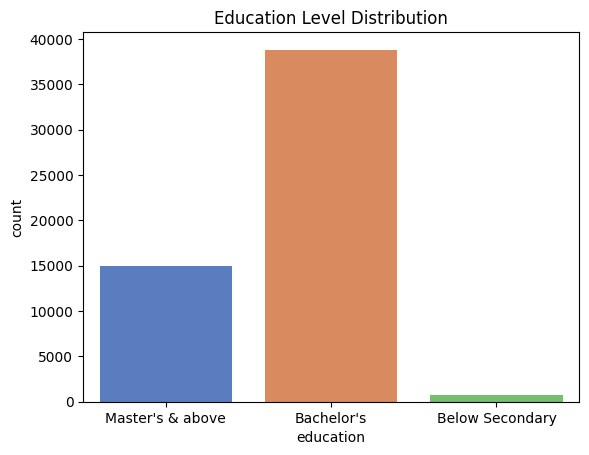

In [ ]:
sns.countplot(x='education', data=df, palette="muted")
plt.title("Education Level Distribution")
plt.show()

Most of the employees have completed their Bacheor's degree and very few have attained the education below secondary level

**Region**

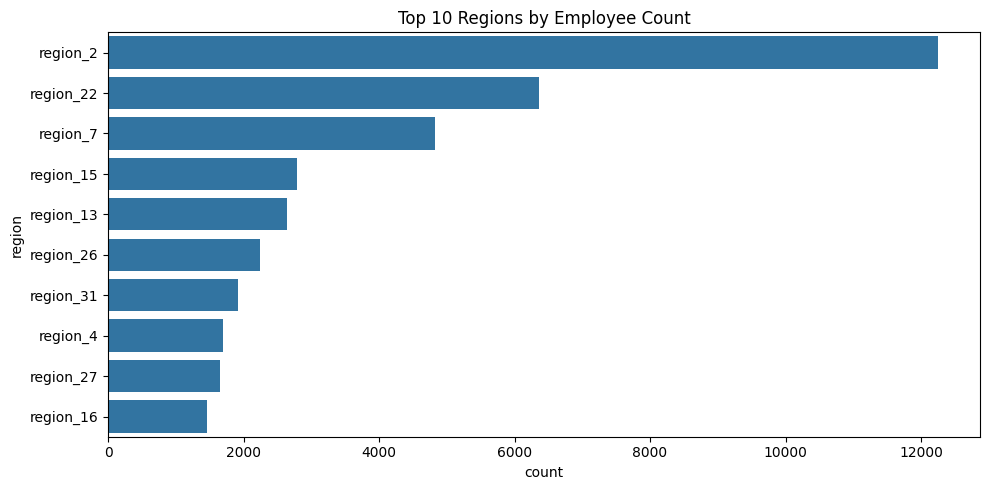

In [ ]:
top_regions = df['region'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='region', data=df[df['region'].isin(top_regions)], order=top_regions)
plt.title("Top 10 Regions by Employee Count")
plt.tight_layout()
plt.show()

Top 10 region by employee count.many employees belong to region_2.

**Gender**

Text(0.5, 1.0, 'Distibution of gender')

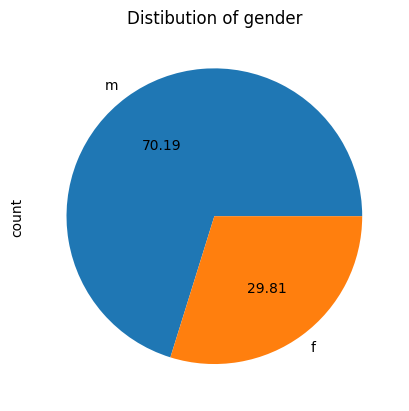

In [ ]:
df['gender'].value_counts().plot(kind='pie',autopct='%1.2f')
plt.title("Distibution of gender")

The composition of males in the organization is 70.19%.

**Department**

<ipython-input-40-0031f696c687>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='department',palette='hls')


<Axes: xlabel='department', ylabel='count'>

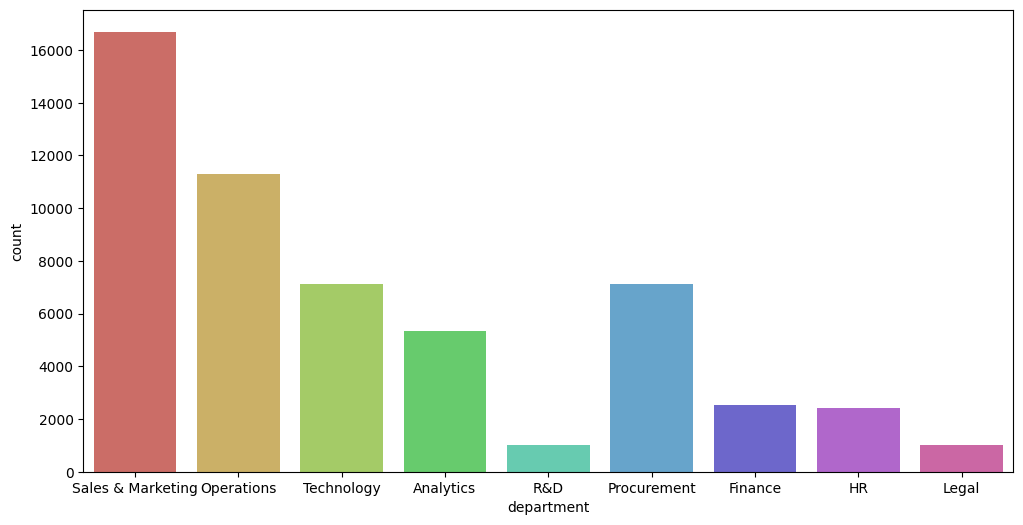

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='department',palette='hls')

Top of the department is Sales&Marketing.

**Recruitment channel**

<Axes: ylabel='count'>

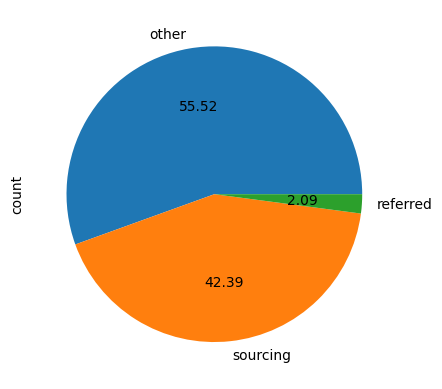

In [ ]:
df['recruitment_channel'].value_counts().plot(kind='pie',autopct='%1.2f')

Over 42% employees are recruitment through sourcing and very few(2%) through referrels.

**Age**

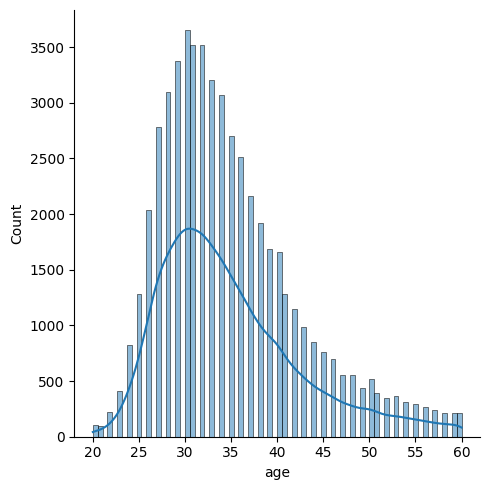

In [ ]:
sns.displot(data=df,x='age',kde=True)

The age feature is rightly skewed.

**No_Of_Training**

Text(0.5, 1.0, 'Number of Trainings Distribution')

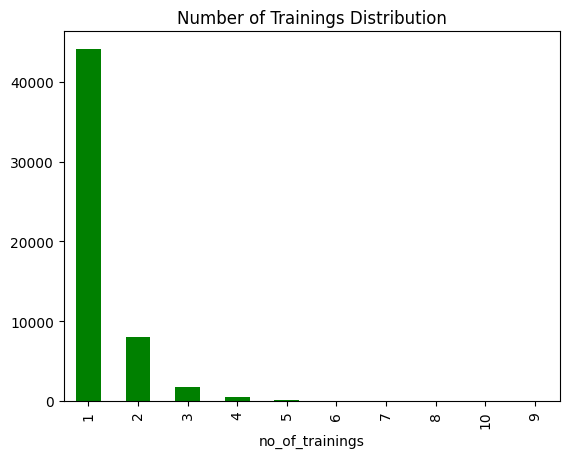

In [ ]:
df['no_of_trainings'].value_counts().plot(kind='bar',color='green')
plt.title("Number of Trainings Distribution")

Most of the employees went through only one training session.

**Previous year rating**

<ipython-input-49-0b6b327de0c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='previous_year_rating', data=df,palette='hls')


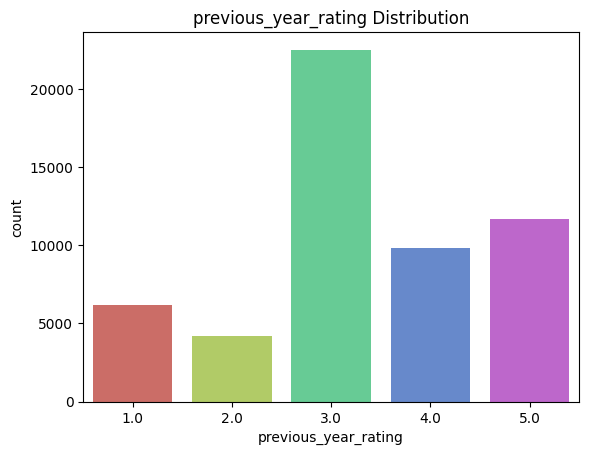

In [ ]:
sns.countplot(x='previous_year_rating', data=df,palette='hls')
plt.title("previous_year_rating Distribution")
plt.show()

Most of the employees have received the average rating of 3 stars in the previous year,followedby 5 stars.

While few employees have received 1 star rating in the previous year

**Length of service**

Text(0.5, 1.0, ' Lenth of service')

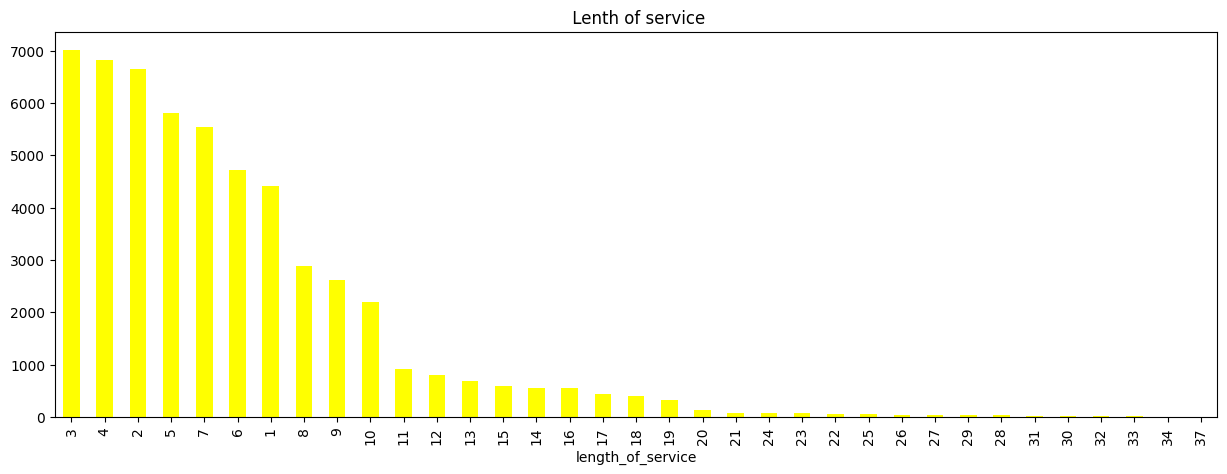

In [ ]:
plt.figure(figsize=(15,5))
df['length_of_service'].value_counts().plot(kind='bar',color='yellow')
plt.title(" Lenth of service")

Many employees have completed 3 years of service.

**Awards won**

Text(0.5, 1.0, ' Awards won distibution')

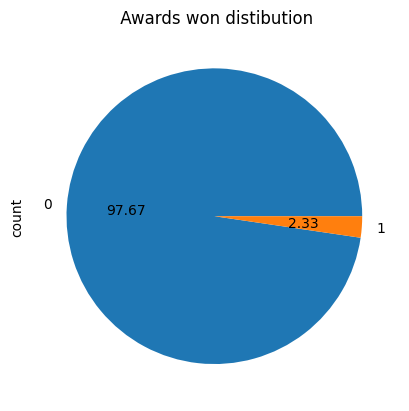

In [ ]:
df['awards_won'].value_counts().plot(kind='pie',autopct='%1.2f')
plt.title(" Awards won distibution")


Very few employees of only 2-3% have won awards.

**Avg-training_score**

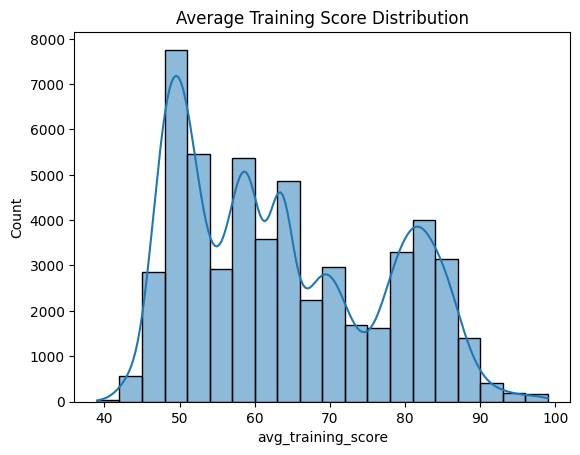

In [ ]:
sns.histplot(df['avg_training_score'], bins=20, kde=True)
plt.title("Average Training Score Distribution")
plt.show()

avg_training_score is unevenly distributed indicating the presence of outliers.

**Promotion**

<Axes: ylabel='count'>

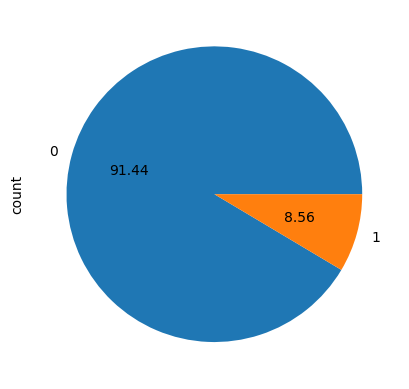

In [ ]:
df['is_promoted'].value_counts().plot(kind='pie',autopct='%1.2f')

About 8.56% of employees have received a promotion.

# **RELATIONSHIP ANALYSIS**

**Gender vs is_Promotion**

Text(0.5, 1.0, 'Promotion Rate by Gender')

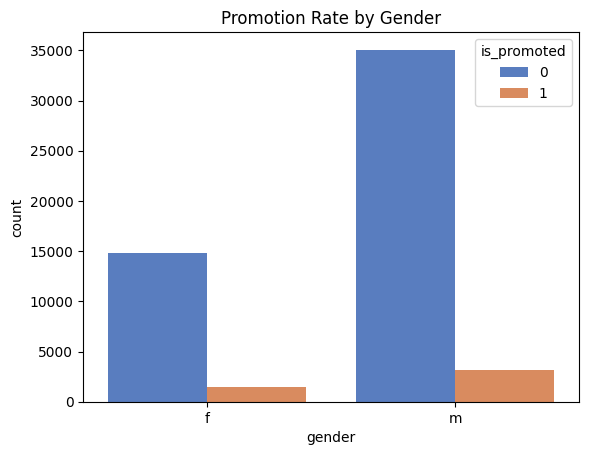

In [ ]:
sns.countplot(data=df,x='gender',hue='is_promoted',palette='muted')
plt.title("Promotion Rate by Gender")

Promotions among male employees is more when compared to females.

**Education vs promotion status**

Text(0.5, 1.0, 'Promotion Rate by Education')

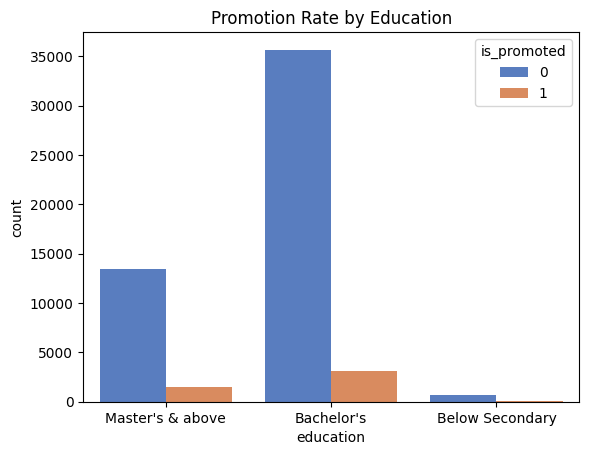

In [ ]:
sns.countplot(data=df,x='education',hue='is_promoted',palette='muted')
plt.title("Promotion Rate by Education")

Even though there are employees who completed their Master's &above , they received less promotions when compared to those who completed just Bachelor's degree.

**Department vs promotion status**

<Axes: xlabel='department', ylabel='count'>

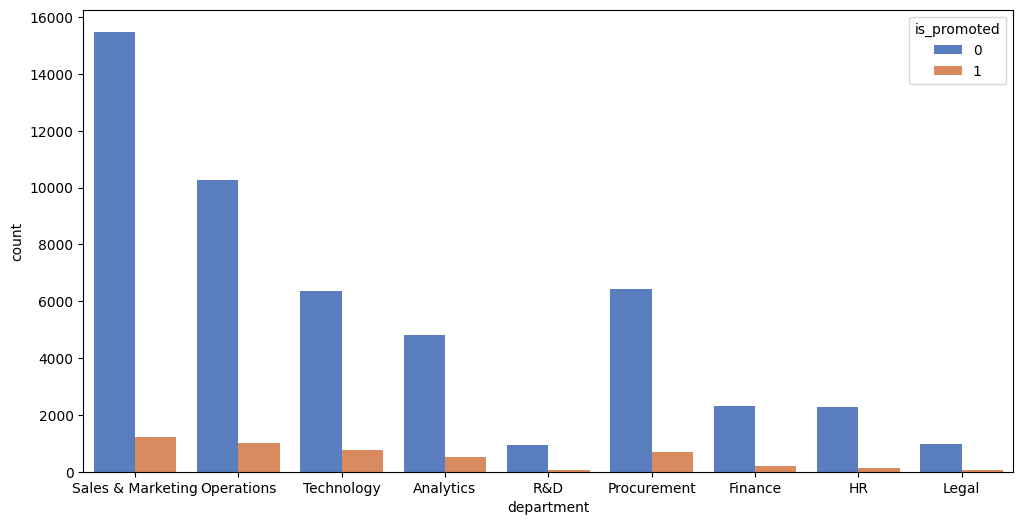

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='department',hue='is_promoted',palette='muted')

Many employees work in Sales & Marketing but the promotions are less when compared to strength of employees in that department, while when compared over all departments , many promotions come from sales&marketing.

Very few employees work in R&D Department.

**Region vs promotion status**

<Axes: xlabel='count', ylabel='region'>

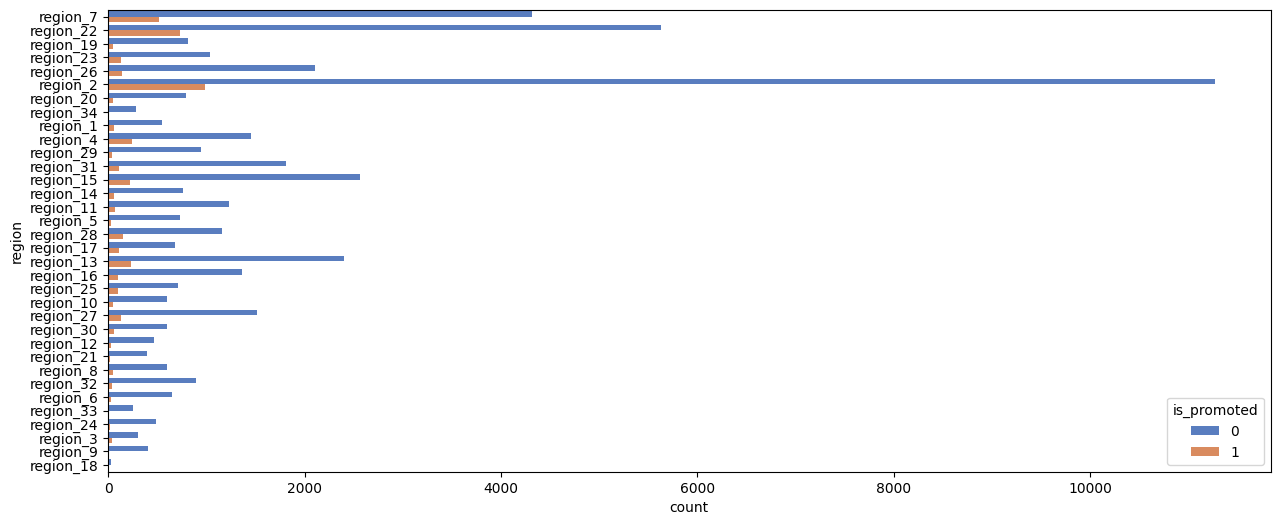

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,y=df['region'],hue='is_promoted',palette='muted')

Many employees who received promotion belong to region2

**Recruitment chgannel vs promotion status**

<Axes: xlabel='recruitment_channel', ylabel='count'>

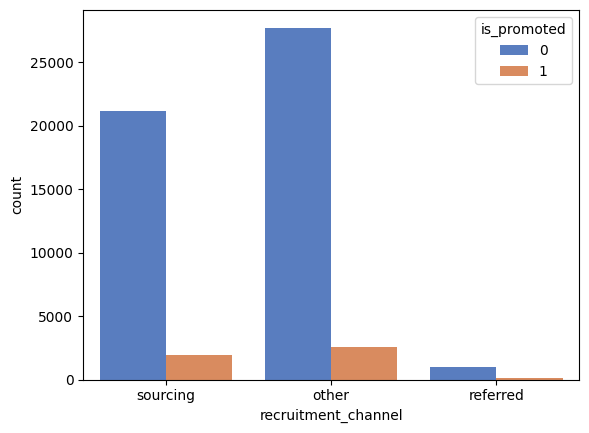

In [ ]:
sns.countplot(data=df,x='recruitment_channel',hue='is_promoted',palette='muted')


Employees recruited through other sources have received more promotions.

**No of Trainings vs Promotion status**

<Axes: xlabel='no_of_trainings', ylabel='count'>

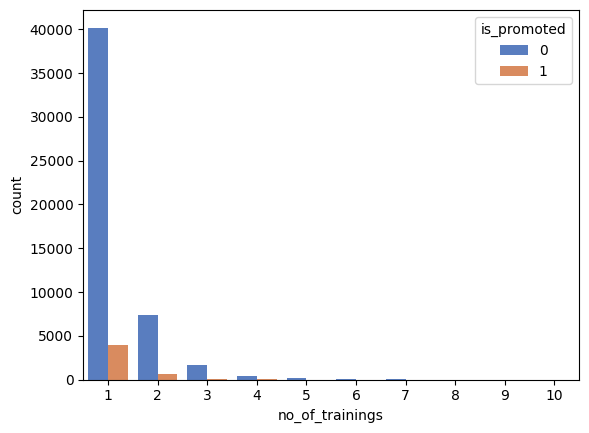

In [ ]:
sns.countplot(data=df,x='no_of_trainings',hue='is_promoted',palette='muted')

**Previous year rating vs Promotion status**

<Axes: xlabel='previous_year_rating', ylabel='count'>

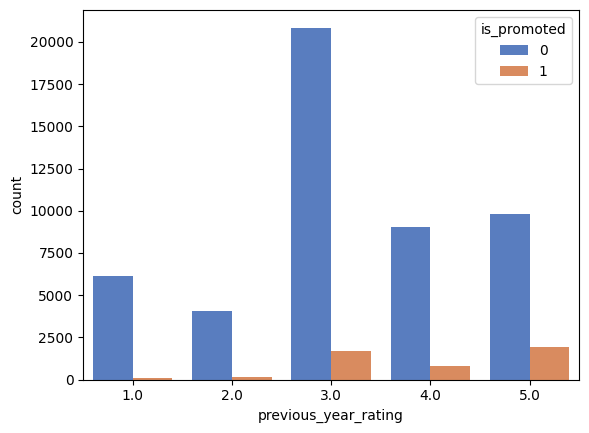

In [ ]:
sns.countplot(data=df,x='previous_year_rating',hue='is_promoted',palette='muted')

Obviously,employees who received 5 star ratings in previous year have received promotions

**Awards won vs Promotion status**

<Axes: xlabel='awards_won', ylabel='count'>

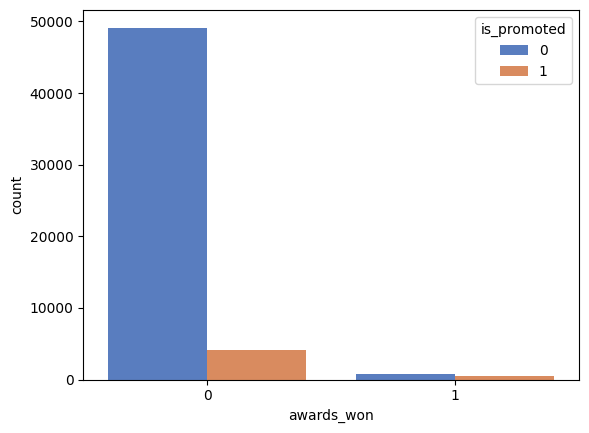

In [ ]:
sns.countplot(data=df,x='awards_won',hue='is_promoted',palette='muted')

Here in contrast, employees who have not won any awards have received promotion when compared to those who received awards

**Age vs promotion status**

<Axes: xlabel='is_promoted', ylabel='age'>

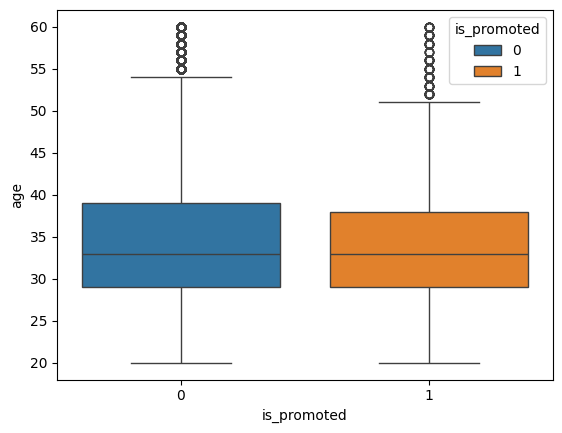

In [ ]:
sns.boxplot(data=df,x='is_promoted',y='age',hue='is_promoted')

Promotion of employees is among employees aged between 30 and 40.

**Training score vs promotion status**

<Axes: xlabel='is_promoted', ylabel='avg_training_score'>

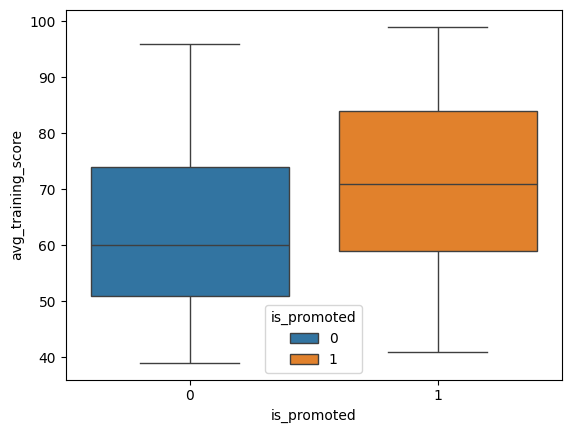

In [ ]:
sns.boxplot(data=df,x='is_promoted',y='avg_training_score',hue='is_promoted')


Employees who received more than an average training score of 70 have received promotions

**Seperating Numerical and Ctegorical columns**

In [ ]:
num_cls = []
for i in df.columns:
  if df.dtypes[i] != 'object':
    num_cls+=[i]
print(num_cls)

['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']

cat_cls = []
for i in df.columns:
  if df.dtypes[i] == 'object':
    cat_cls+=[i]
print(cat_cls)

['department', 'region', 'education', 'gender', 'recruitment_channel']

['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
['department', 'region', 'education', 'gender', 'recruitment_channel']


['department', 'region', 'education', 'gender', 'recruitment_channel']

<Axes: >

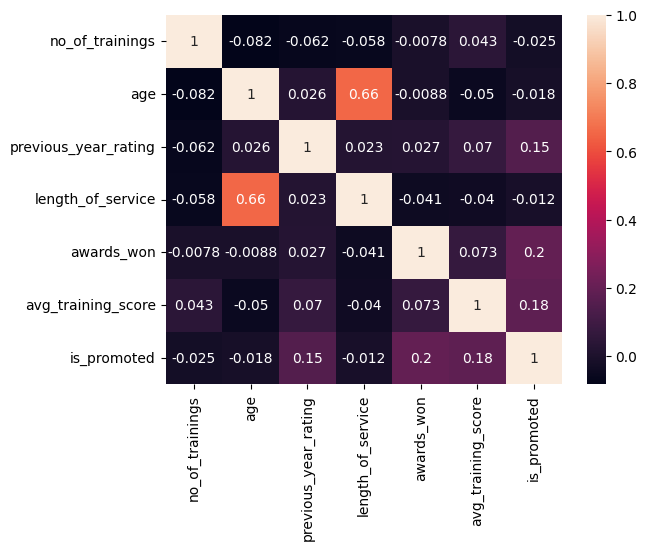

In [ ]:

sns.heatmap(data=df[num_cls].corr(),annot=True)

There is a correlation between age and length_of_service of about 0.66

# FEATURE ENGINEERING

**Encoding categorical features**

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
df['department'] = encoder.fit_transform(df[['department']])
df['region'] = encoder.fit_transform(df[['region']])
df['gender'] = encoder.fit_transform(df[['gender']])
df['recruitment_channel'] = encoder.fit_transform(df[['recruitment_channel']])

In [ ]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,0.0,0.0,2,1.0,0.0,1,35,5.0,8,0,49.0,0
1,0.0,0.0,0,0.0,1.0,1,30,5.0,4,0,60.0,0
2,0.0,0.0,0,0.0,0.0,1,34,3.0,7,0,50.0,0
3,0.0,0.0,0,0.0,1.0,2,39,1.0,10,0,50.0,0
4,0.0,0.0,0,0.0,1.0,1,45,3.0,2,0,73.0,0


**Feature scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler

target = 'is_promoted'
scaler = RobustScaler()
feature_columns = [col for col in df.columns if col != target]
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [ ]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,0.0,0.0,1.0,1.0,-1.0,0.0,0.2,2.0,0.75,0.0,-0.541667,0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,2.0,-0.25,0.0,-0.083333,0
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.1,0.0,0.50,0.0,-0.500000,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.6,-2.0,1.25,0.0,-0.500000,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,-0.75,0.0,0.458333,0


In [ ]:
y = df['is_promoted']
X = df.drop(columns='is_promoted')

# **Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(43612, 11)
(43612,)
(10904, 11)
(10904,)


# Model Fitting

Since this is a classification problem we can use Logistic Regression,Decision tree and Random Forest algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_train,y_train)
y_predict = lg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_predict))

Accuracy: 0.9220469552457814
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9991
           1       0.77      0.10      0.17       913

    accuracy                           0.92     10904
   macro avg       0.85      0.55      0.57     10904
weighted avg       0.91      0.92      0.89     10904



**Confusion Matrix**

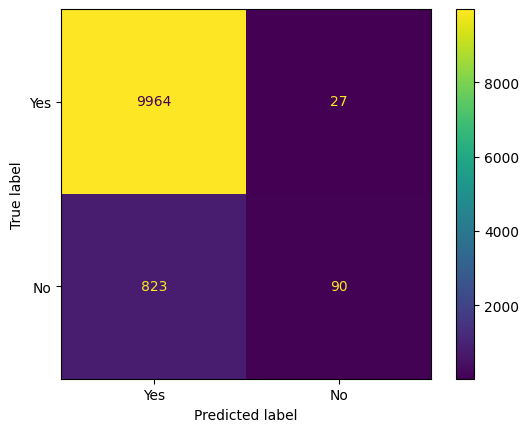

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)

class_names = ['Yes', 'No']  # Or whatever your class labels are
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=class_names)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8686720469552458
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9991
           1       0.23      0.25      0.24       913

    accuracy                           0.87     10904
   macro avg       0.58      0.59      0.58     10904
weighted avg       0.87      0.87      0.87     10904



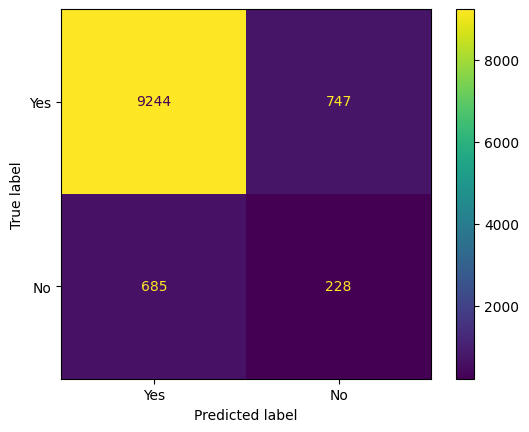

In [ ]:
cm = confusion_matrix(y_test, y_pred)

class_names = ['Yes', 'No']  # Or whatever your class labels are
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create model
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predict
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.917094644167278
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      9991
           1       0.51      0.19      0.28       913

    accuracy                           0.92     10904
   macro avg       0.72      0.59      0.62     10904
weighted avg       0.90      0.92      0.90     10904



**Data overview Dataset**:EMPLOYEE EVALUTION FOR PROMOTION dataset with 54808 rows and 13 columns.

Type of Problem: Classification

**1:Data Preprocessing**
Target Variable:Promotion Status(is_prormoted)
Feature types:
Categorical:Department,Region,Education,Gender,Recruiment_channel
Numerical:Employee_id,no_of_trainings,age,previous_year_rating,lenth_of_service,awards_won,avg_training_score,is_promoted.
Insight:Some of the null values in the dataset,so fill the mode() and medium() of the given columns.their is no duplicate values in the dataset.

**2:Exploratory Data Analysis(EDA)**
->Categorical Analysis:Gender *29.81% female,*70.19%male.

->Visualized distributions with countplots and pie charts.

->Boxplots highlighted the influence of:
avg_training_score
previous_year_rating
awards_won

->Target variable(is_promoted)was found to be highly imbalanced,with far fewer promotions.

**3:Modeling and Evalution**

->Logistic Regression:
Achieved 92% accuracy, the best-performing model in the project.

Robust despite the class imbalance and interpretable for stakeholders.

Evaluated using accuracy, classification report (precision, recall, F1-score), and confusion matrix.

->Decision Tree Classifier:

Achieved 86% accuracy.

Helped visualize decision rules and feature splits.

Good interpretability, but slightly lower generalization performance than logistic regression.

-> RandomForestClassifier:
Achieved 91% Accuracy.
Helped visualize decision rules and feature splits.

Good interpretability, but slightly lower generalization performance than logistic regression.

**Conclusion**

Logistic Regression outperformed the Decision Tree and RandomForestClassifier in this case,offering better generalization and higher accuracy(92%).